In [67]:
import importlib

In [68]:
import envs.bayesian_learning as bl
import envs.multi_modal as mm
importlib.reload(bl)
importlib.reload(mm)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [69]:
obs = bl.generate_data(20)
obs

array([ 2.6186908 ,  1.46274452,  1.33456131, -1.0837269 ,  0.2944799 ,
        1.99223507,  1.8351008 ,  0.44495459,  1.4012683 , -1.24907645,
       -0.5178622 ,  1.07539306, -0.86520911, -0.5270405 ,  0.46830057,
        1.21033141, -2.02310289, -0.60652692,  0.23742077,  2.31104827])

In [70]:
env = bl.BayesianLearningTied(observations=obs)

In [90]:
sampler = mm.MetropolisHastingsSampler(env, proposal_std=0.1)
samps = sampler.sample(10000)
print("Acceptance Rate:", sampler.acceptance_rate())
print("Average Moved Distance:", sampler.average_moved_distance())

Acceptance Rate: 0.8792
Average Moved Distance: 0.106645429051165


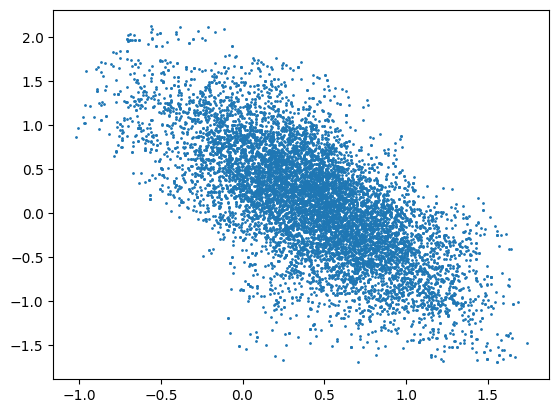

In [97]:
plt.scatter(samps[1:, 0], samps[1:, 1], s=1)

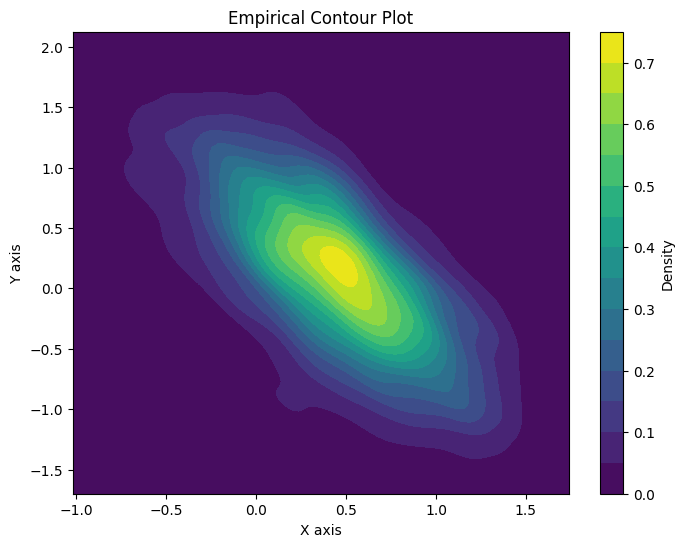

In [95]:
from scipy.stats import gaussian_kde

def plot_empirical_contour(data):
    # Compute KDE
    kde = gaussian_kde(data.T)

    # Create grid
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])

    # Evaluate KDE on grid
    kde_values = kde(grid_coords).reshape(x_grid.shape)

    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contourf(x_grid, y_grid, kde_values, levels=15, cmap="viridis")
    plt.colorbar(label='Density')
    # plt.scatter(data[:, 0], data[:, 1], s=5, color='red', alpha=0.1)  # Plot raw data points
    plt.title('Empirical Contour Plot')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

# Example usage
plot_empirical_contour(samps)

### Applying the Ensemble Kalman Sampler

In [73]:
alphas = [0, 0.1, 0.2, 0.5, 1]  # Adjust these ranges as needed
epsilons = np.linspace(0.05, 0.5, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = mm.EnsembleLangevinSampler(env, ensemble=10, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=10000, use_cov=True)  # Adjust the number of samples as needed
        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 10000/10000 [00:34<00:00, 289.15it/s]
/Users/starli/Documents/GitHub/gflownet/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/starli/Documents/GitHub/gflownet/venv/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 10000/10000 [00:34<00:00, 287.45it/s]


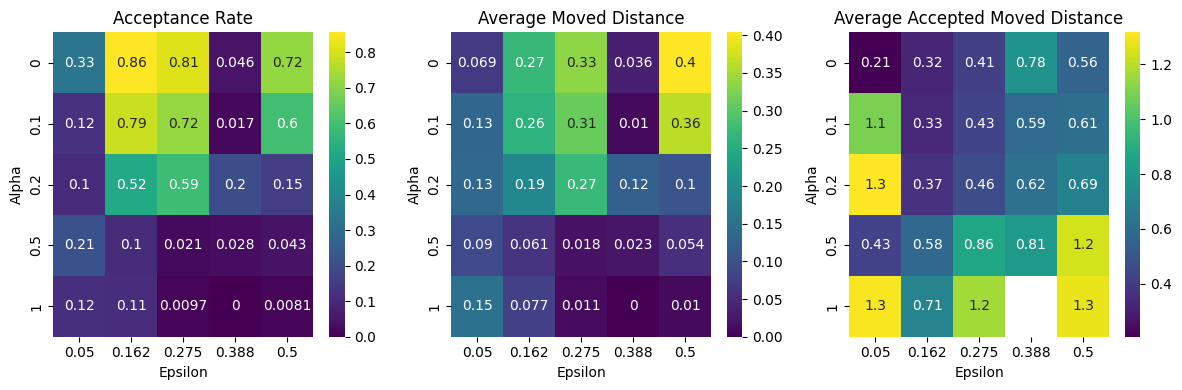

In [75]:
import seaborn as sns

epsilons = np.round(epsilons, decimals=3)
# Plotting
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.subplot(1, 3, 3)
sns.heatmap(average_acc_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Accepted Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [76]:
alphas = [0, 0.05, 0.1, 0.2, 0.3]  # Adjust these ranges as needed
epsilons = np.linspace(0.05, 0.5, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(alphas):
    for j, epsilon in enumerate(epsilons):
        sampler = mm.EnsembleLangevinSampler(env, ensemble=10, epsilon=epsilon, alpha=alpha)
        sampler.sample(iterations=10000, use_cov=False)  # Adjust the number of samples as needed
        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 10000/10000 [00:35<00:00, 285.64it/s]


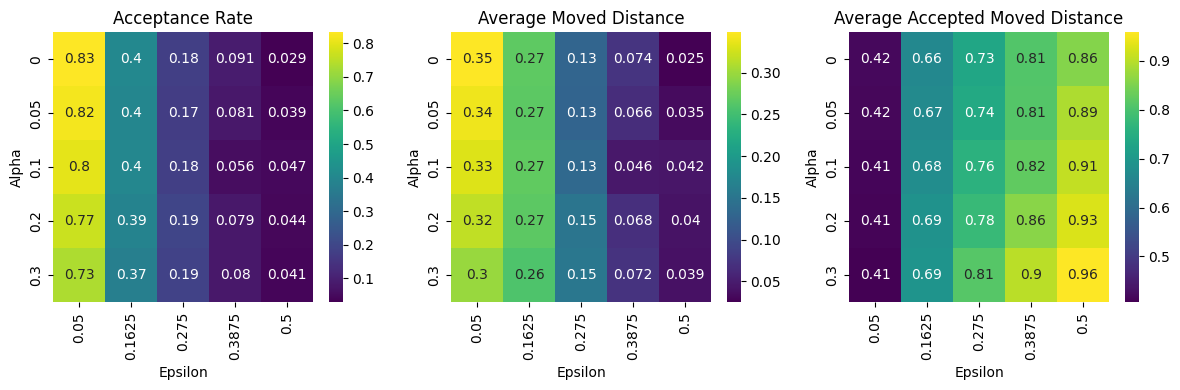

In [77]:
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.subplot(1, 3, 3)
sns.heatmap(average_acc_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Accepted Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()

In [79]:
ens_cov = mm.EnsembleLangevinSampler(env, ensemble=10, epsilon=0.5, alpha=0.1)
ens_cov_samps = ens_cov.sample(5000)
ens_no_cov = mm.EnsembleLangevinSampler(env, ensemble=10, epsilon=0.05, alpha=0.05)
ens_no_cov_samps = ens_no_cov.sample(5000, use_cov=False)  # Adjust the number of samples as needed
best_mh = mm.MetropolisHastingsSampler(env, proposal_std=0.15)
mh_samps = best_mh.sample(50000)  # Adjust the number of samples as needed

100%|██████████| 5000/5000 [00:17<00:00, 284.35it/s]


In [83]:
def mean_deviation_over_time(samples, ground_truth_mean):
    deviations = []
    cumulative_sum = np.zeros_like(samples[0])

    for t in range(1, len(samples) + 1):
        cumulative_sum += samples[t - 1]
        empirical_mean = cumulative_sum / t
        deviation = np.linalg.norm(empirical_mean - ground_truth_mean)
        deviations.append(deviation)
    return deviations

def plot_mean_deviation(samples_list, labels):
    ground_truth_mean = [0.5, 0]
    plt.figure(figsize=(10, 6))

    for samples, label in zip(samples_list, labels):
        deviations = mean_deviation_over_time(samples, ground_truth_mean)
        plt.plot(range(1, len(samples) + 1), deviations, label=label)

    plt.xlabel('Number of Samples (t)')
    plt.ylabel('Mean Deviation')
    plt.title('Mean Deviation Over Time for Multiple Samplers')
    plt.legend()
    plt.show()

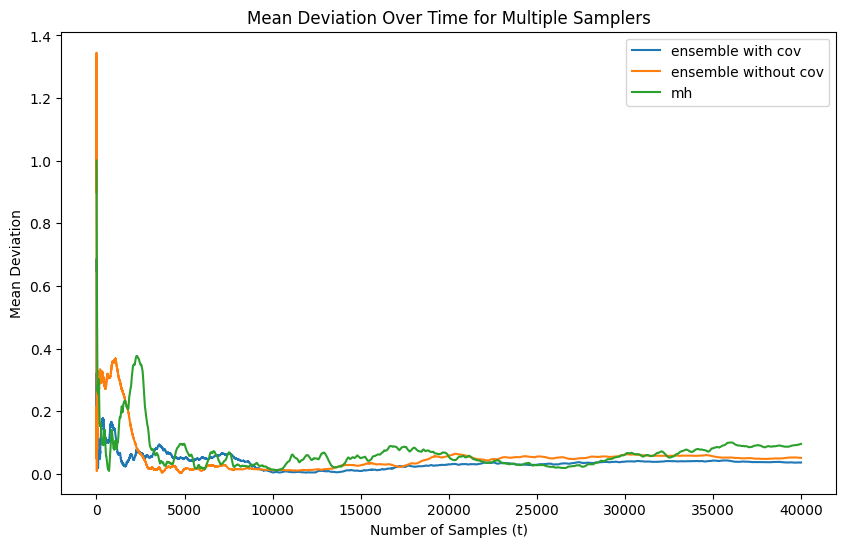

In [84]:
plot_mean_deviation([ens_cov_samps[10000:], ens_no_cov_samps[10000:], mh_samps[10000:]], ["ensemble with cov", "ensemble without cov", "mh"])

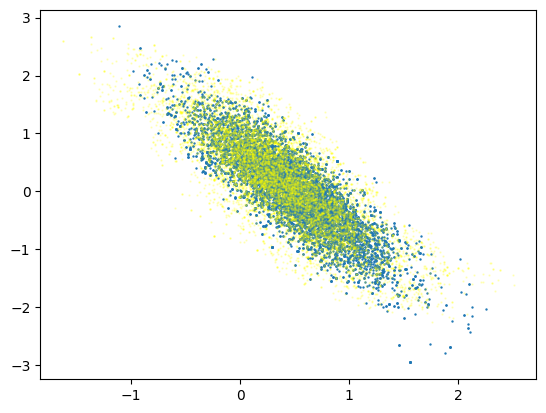

In [107]:
plt.scatter(ens_cov_samps[40001:, 0], ens_cov_samps[40001:, 1], s=0.5)
plt.scatter(mh_samps[40001:, 0], mh_samps[40001:, 1], color="yellow", s=0.5, alpha=0.2)

### Traditional Langevin (Non-ensemble) Cases

In [108]:
alphas = [0, 0.1, 0.2, 0.5, 1]  # Adjust these ranges as needed
epsilons = np.linspace(0.05, 0.5, 5)

# Grid to store results
acceptance_rates = np.zeros((len(alphas), len(epsilons)))
average_distances = np.zeros((len(alphas), len(epsilons)))
average_acc_distances = np.zeros((len(alphas), len(epsilons)))

for i, alpha in enumerate(tqdm(alphas)):
    for j, epsilon in enumerate(epsilons):
        sampler = mm.LangevinSampler(env, epsilon=epsilon, alpha=alpha)
        sampler.sample(10000)  # Adjust the number of samples as needed

        acceptance_rates[i, j] = sampler.acceptance_rate()
        average_distances[i, j] = sampler.average_moved_distance(total=True)
        average_acc_distances[i, j] = sampler.average_moved_distance(total=False)

100%|██████████| 5/5 [01:17<00:00, 15.44s/it]


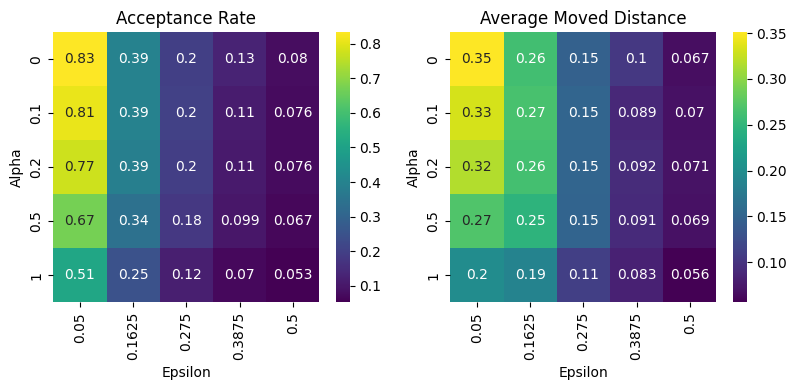

In [110]:
plt.figure(figsize=(12, 4))

# Heatmap for Acceptance Rates
plt.subplot(1, 3, 1)
sns.heatmap(acceptance_rates, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Acceptance Rate')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

# Heatmap for Average Moved Distance
plt.subplot(1, 3, 2)
sns.heatmap(average_distances, annot=True, xticklabels=epsilons, yticklabels=alphas, cmap='viridis')
plt.title('Average Moved Distance')
plt.xlabel('Epsilon')
plt.ylabel('Alpha')

plt.tight_layout()
plt.show()